In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
path = 'data/data.csv'
df =pd.read_csv(path, header=None)
X = df.iloc[:,0]
Y = df.iloc[:,1]

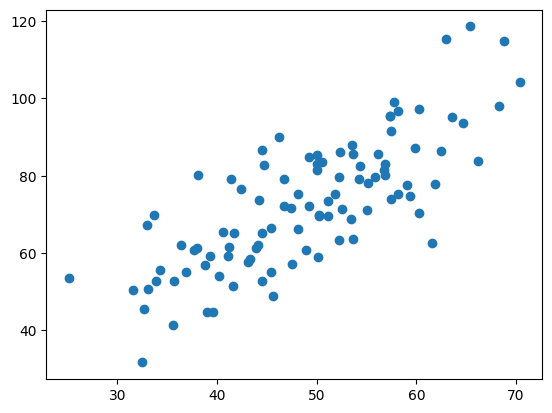

In [6]:
plt.scatter(X,Y)
plt.show()

In [23]:
def CostValuation(X,Y,m,b):
    return (2/len(X)) * sum(Y - (m*X+b)**2)
    

In [24]:
def GradientDescent(X,Y,learnRate, epochs):
  m = 0
  b = 0
  n = float(len(X))
  costList = []

  for epoch in range(epochs):
    YPredict = m*X + b
    derWithM = (-2/n) * sum(X * (Y - YPredict))
    derWithB = (-2/n) * sum(Y - YPredict)
    #update m and b with respect to differentiation
    m = m - learnRate * derWithM
    b = b - learnRate * derWithB
    costList.append(CostValuation(X,Y,m,b)) 
    if (epoch%(epochs/10)==0):
      print("Epoch :", epoch/10, "% with: m = {valueofM}, b = {valueofB}".format(valueofM=m, valueofB = b))

  return(m,b,costList)

In [25]:
m, b, cost = GradientDescent(X,Y, 0.0001, 1000)
# m, b = 1.4796491688889395, 0.10148121494753734

YPredict = m * X + b

Epoch : 0.0 % with: m = 0.7370702973591055, b = 0.014547010110737297
Epoch : 10.0 % with: m = 1.4788015372774521, b = 0.03513502002912928
Epoch : 20.0 % with: m = 1.4786835569145387, b = 0.04113767542736797
Epoch : 30.0 % with: m = 1.4785656655669113, b = 0.047135801867800996
Epoch : 40.0 % with: m = 1.4784478631674083, b = 0.05312940276749255
Epoch : 50.0 % with: m = 1.478330149648919, b = 0.059118481540928546
Epoch : 60.0 % with: m = 1.4782125249443832, b = 0.06510304160001894
Epoch : 70.0 % with: m = 1.4780949889867918, b = 0.07108308635409932
Epoch : 80.0 % with: m = 1.4779775417091856, b = 0.07705861920993279
Epoch : 90.0 % with: m = 1.4778601830446565, b = 0.08302964357171239


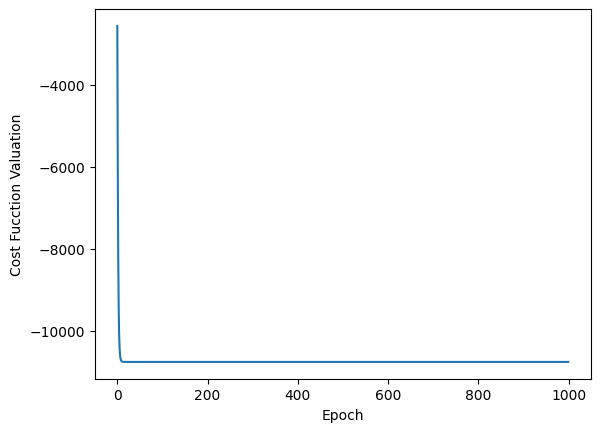

In [26]:
plt.plot(cost)
plt.xlabel("Epoch")
plt.ylabel("Cost Fucction Valuation")
plt.show()

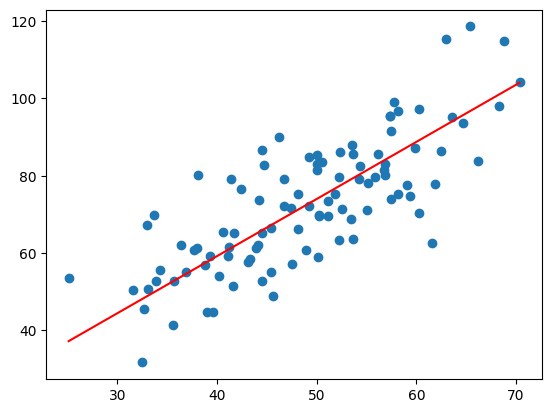

In [10]:
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(YPredict), max(YPredict)], color="red")
plt.show()

In [11]:
print(type(X))

<class 'pandas.core.series.Series'>


Comparing custom gradient descent with linear_regression form sikit learn

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()
Xarray  = X.to_numpy().reshape(-1,1)
predictor = model.fit(Xarray,Y)
YPredictSK = predictor.predict(Xarray)
print("Coefficient form SK-Learn Model: ", predictor.coef_)
print("Intercept from SK-Learn ModelL:", predictor.intercept_)

Coefficient form SK-Learn Model:  [1.32243102]
Intercept from SK-Learn ModelL: 7.991020982270371


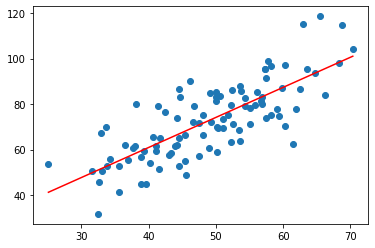

In [30]:
plt.scatter(X,Y)
plt.plot([min(X), max(X)],[min(YPredictSK), max(YPredictSK)], color="red")
plt.show()